In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1.5. Scipy : high-level scientific computing

El paquete de Scipy contiene varias herramientas dedicadas a situaciones comunes en el cómputo científico. Cada sub-módulo corresponde a distintas aplicaciones, por ejemplo interpolación, integración, optimización, procesamiento de imagénes, estadística, etc.

En su mayoria, las funciones disponibles depende de **NumPy** ( `scipy.cos` en realidad es `np.cos`).

### Módulos más populares:
https://docs.scipy.org/doc/scipy/reference/py-modindex.html

Sub-module | Task
--------|------
scipy.cluster | Vector quantization / Kmeans
scipy.constants | Physical and mathematical constants
scipy.fftpack | Fourier transform
scipy.integrate | Integration routines
scipy.interpolate | Interpolation
scipy.io | Data input and output
scipy.linalg | Linear algebra routines
scipy.ndimage | n-dimensional image package
scipy.odr | Orthogonal distance regression
scipy.optimize | Optimization
scipy.signal | Signal processing
scipy.sparse | Sparse matrices
scipy.spatial | Spatial data structures and algorithms
scipy.special | Any special mathematical functions
scipy.stats | Statistics


## Interpolación - `scipy.interpolate`

Imaginemos que tenemos datos de un experimento y la salida es parecida a una función senoidal:

In [4]:
measured_time = np.linspace(0, 1, 10)
measured_time

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [5]:
noise = (np.random.random(10)*2 - 1) * 1e-1
noise

array([-0.04272296,  0.0312835 , -0.08578147,  0.08775322,  0.02883865,
        0.00398011,  0.06899103, -0.05361981, -0.06211039,  0.02908427])

In [6]:
measures = np.sin(2 * np.pi * measured_time) + noise
measures

array([-0.04272296,  0.67407111,  0.89902628,  0.95377863,  0.37085879,
       -0.33804004, -0.79703437, -1.03842756, -0.704898  ,  0.02908427])

In [8]:
# Interpolate it to new time points

from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

In [9]:
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)

In [10]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

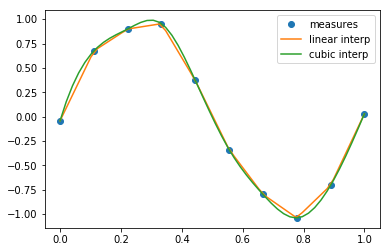

In [11]:
# Plot the data and the interpolation
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

**Hablando sobre Ciencia de Datos, bajo qué situaciones es útil interpolar datos?**

---

## Estadística ` scipy.stats`

El módulo `stats` contiene las herramientas de Estadística y Probabilidad para describir eventos o procesos.

### Distribuciones.

Dadas las obsercaciones de un proceso aleatorio, su histograma es un estimador de su PDF (FPD, Función de densidad de probabilidad):

In [14]:
samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [15]:
histogram = np.histogram(samples, bins=bins, normed=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
bins

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

In [16]:
from scipy import stats
pdf = stats.norm.pdf(bins)

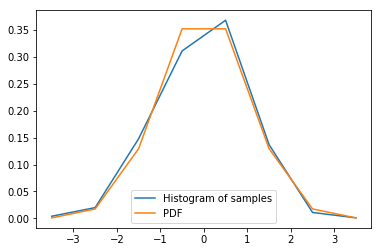

In [25]:
plt.plot(bins, histogram, label="Histogram of samples");
plt.plot(bins, pdf, label="PDF") 
plt.legend()
plt.show()b

### Media, mediana, percentiles: